# Step 1: Load & Understand the Dataset

In [3]:
import pandas as pd

df = pd.read_csv(r"../data/Womens Clothing E-Commerce Reviews.csv")
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Typical columns in this dataset:

Review Text → main unstructured text

Rating (1–5)

Recommended IND (0/1)

Division Name

Department Name

Class Name

Age

In [4]:
df.info()
df['Rating'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

# Step 2: Data Cleaning & Preprocessing (NLP Core)

In [6]:
# Handle Missing Reviews
df = df.dropna(subset=['Review Text'])


In [7]:
#Text Cleaning

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['Review Text'].apply(clean_text)


What we remove

HTML tags

Special characters

Numbers

Extra spaces

In [9]:
# Tokenization, Stopwords, Lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['processed_review'] = df['clean_review'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...


# Step 3: Exploratory Text Analysis (ETA)

Rating	Sentiment
4–5	Positive
3	Neutral
1–2	Negative

In [11]:
# Create Sentiment Labels (Using Ratings)

def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['Rating'].apply(label_sentiment)


In [14]:
!pip install wordcloud


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

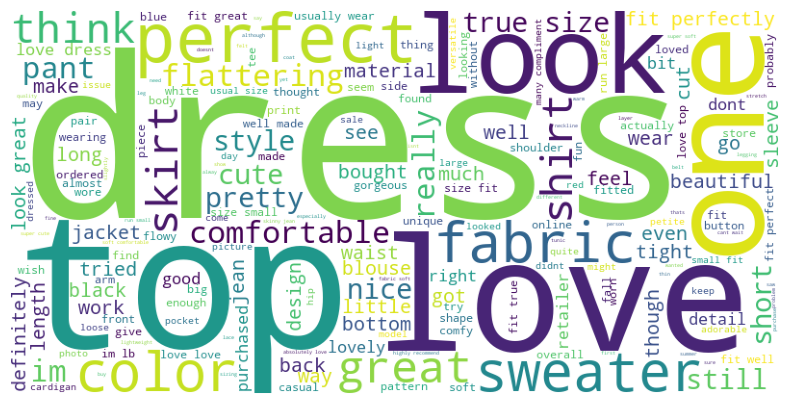

In [15]:
# Word Clouds (VERY IMPORTANT VISUAL)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df.sentiment=='Positive']['processed_review'])

wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

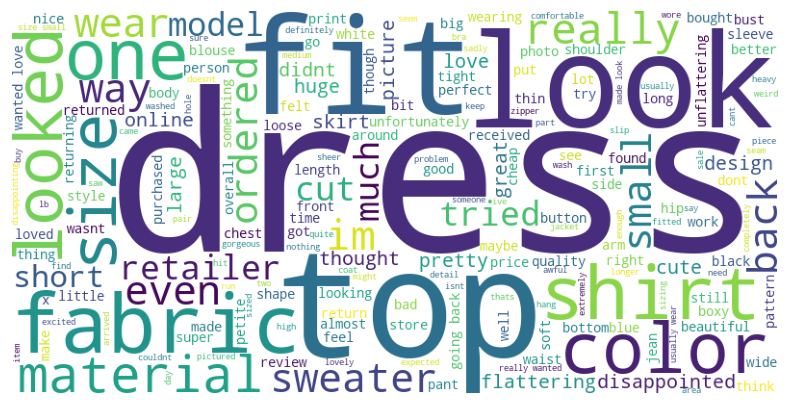

In [18]:
# Word clous for negative reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_text = " ".join(df[df.sentiment=='Negative']['processed_review'])

wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

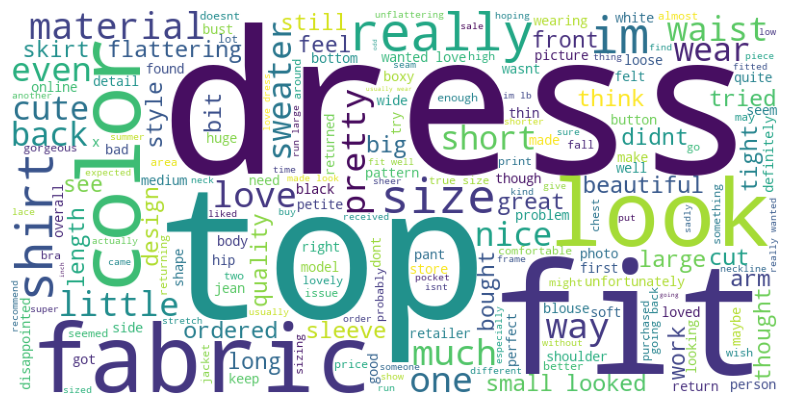

In [20]:
# word cloud for neutral reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

neutral_text = " ".join(df[df.sentiment=='Neutral']['processed_review'])

wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')


In [24]:
# N-gram Analysis (Bigrams/Trigrams)

from sklearn.feature_extraction.text import CountVectorizer

bigram = CountVectorizer(ngram_range=(2,2), max_features=20)
X = bigram.fit_transform(df['processed_review'])

pd.DataFrame(X.toarray(), columns=bigram.get_feature_names_out()).sum().sort_values(ascending=False)


true size        1300
fit perfectly    1076
look great        896
look like         799
love dress        731
usually wear      689
fit well          656
im lb             626
fit great         578
size fit          568
size small        548
love top          546
run large         536
well made         511
fit true          500
feel like         494
usual size        489
fit like          468
fit perfect       444
small fit         419
dtype: int64

# Step 4: Text Vectorization

Use TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_review'])
y = df['sentiment']


TF-IDF Matrix Shape: (22641, 5000)


# Step 5: Sentiment Classification (ML Models)

Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Evaluation Metrics

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.56      0.42      0.48       457
     Neutral       0.50      0.23      0.31       588
    Positive       0.87      0.97      0.92      3484

    accuracy                           0.82      4529
   macro avg       0.64      0.54      0.57      4529
weighted avg       0.79      0.82      0.79      4529



confusion matrix

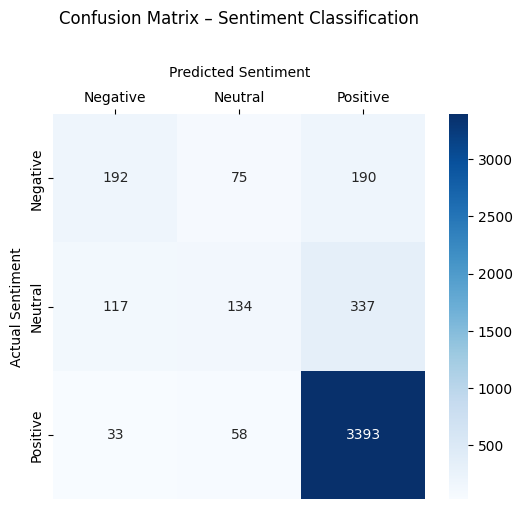

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ['Negative', 'Neutral', 'Positive']

cm = confusion_matrix(y_test, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax
)

# ---- MOVE X AXIS TO TOP ----
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# ---- LABELS & TITLE ----
ax.set_xlabel("Predicted Sentiment", labelpad=10)
ax.set_ylabel("Actual Sentiment")
ax.set_title("Confusion Matrix – Sentiment Classification", pad=30)

plt.show()



Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [43]:
y_pred_nb = nb_model.predict(X_test)


In [42]:
from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:\n")
print(classification_report(
    y_test,
    y_pred_nb,
    target_names=['Negative', 'Neutral', 'Positive']
))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

    Negative       0.77      0.08      0.14       457
     Neutral       0.37      0.01      0.02       588
    Positive       0.78      1.00      0.88      3484

    accuracy                           0.78      4529
   macro avg       0.64      0.36      0.35      4529
weighted avg       0.72      0.78      0.69      4529



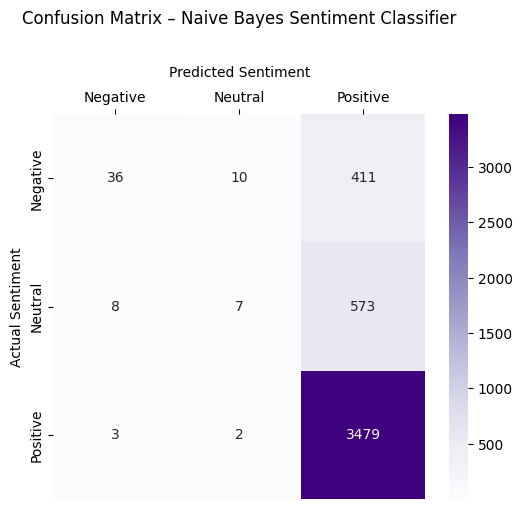

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Negative', 'Neutral', 'Positive']

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)

fig, ax = plt.subplots(figsize=(6,5))

sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax
)

# Move X-axis labels to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel("Predicted Sentiment", labelpad=10)
ax.set_ylabel("Actual Sentiment")
ax.set_title("Confusion Matrix – Naive Bayes Sentiment Classifier", pad=30)

plt.show()


## Fine-Tuned Logistic Regression ##

Train Fine-Tuned Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr_balanced.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [46]:
y_pred_lr_bal = lr_balanced.predict(X_test)


Classification report

In [47]:
from sklearn.metrics import classification_report

print("Final Model – Logistic Regression (Balanced)\n")
print(classification_report(
    y_test,
    y_pred_lr_bal,
    target_names=['Negative', 'Neutral', 'Positive']
))


Final Model – Logistic Regression (Balanced)

              precision    recall  f1-score   support

    Negative       0.43      0.60      0.50       457
     Neutral       0.34      0.47      0.39       588
    Positive       0.95      0.84      0.89      3484

    accuracy                           0.77      4529
   macro avg       0.57      0.63      0.60      4529
weighted avg       0.82      0.77      0.79      4529



📊 Confusion Matrix fine tuned lr

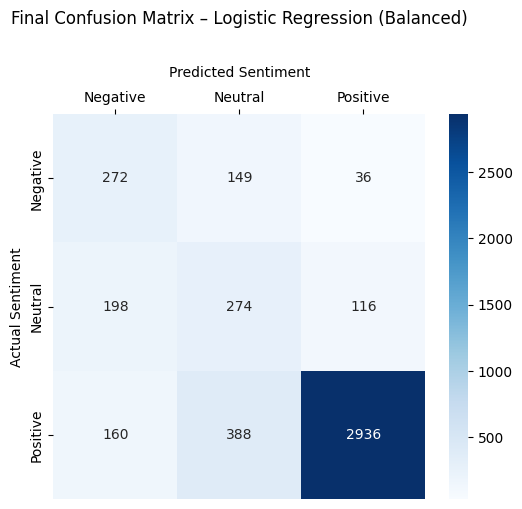

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Negative', 'Neutral', 'Positive']

cm_lr_bal = confusion_matrix(y_test, y_pred_lr_bal, labels=labels)

fig, ax = plt.subplots(figsize=(6,5))

sns.heatmap(
    cm_lr_bal,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax
)

# Move x-axis labels to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel("Predicted Sentiment", labelpad=10)
ax.set_ylabel("Actual Sentiment")
ax.set_title(
    "Final Confusion Matrix – Logistic Regression (Balanced)",
    pad=30
)

plt.show()


Normalized Confusion Matrix (Percentages) Balanced  fine tuned logistic regression


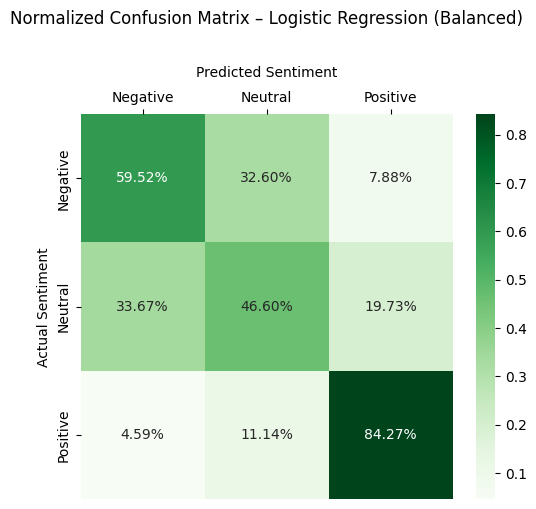

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ['Negative', 'Neutral', 'Positive']

cm = confusion_matrix(y_test, y_pred_lr_bal, labels=labels)

# Normalize row-wise (actual sentiment)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(6,5))

sns.heatmap(
    cm_norm,
    annot=True,
    fmt='.2%',
    cmap='Greens',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax
)

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel("Predicted Sentiment", labelpad=10)
ax.set_ylabel("Actual Sentiment")
ax.set_title(
    "Normalized Confusion Matrix – Logistic Regression (Balanced)",
    pad=30
)

plt.show()


“The normalized confusion matrix shows that the balanced model correctly identifies a significantly higher percentage of negative and neutral reviews compared to the baseline model, demonstrating improved fairness across sentiment classes.”

---SVM (SVC) model--------

In [63]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    class_weight='balanced',
    random_state=42
)

svm_model.fit(X_train, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [64]:
y_pred_svm = svm_model.predict(X_test)


In [65]:
from sklearn.metrics import classification_report

print("Linear SVM Classification Report\n")
print(classification_report(
    y_test,
    y_pred_svm,
    target_names=['Negative', 'Neutral', 'Positive']
))


Linear SVM Classification Report

              precision    recall  f1-score   support

    Negative       0.45      0.52      0.48       457
     Neutral       0.40      0.36      0.38       588
    Positive       0.91      0.91      0.91      3484

    accuracy                           0.80      4529
   macro avg       0.59      0.60      0.59      4529
weighted avg       0.80      0.80      0.80      4529



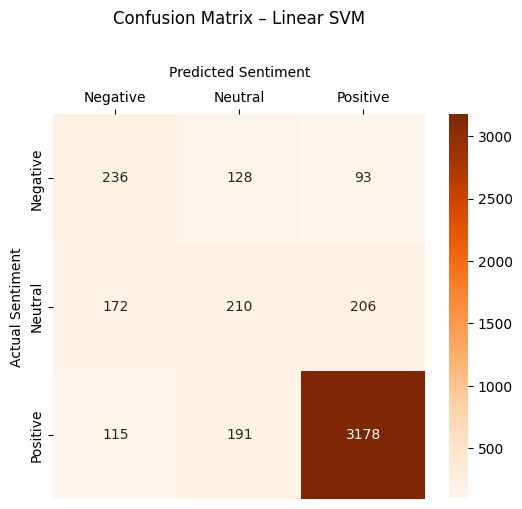

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Negative', 'Neutral', 'Positive']

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

fig, ax = plt.subplots(figsize=(6,5))

sns.heatmap(
    cm_svm,
    annot=True,
    fmt='d',
    cmap='Oranges',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax
)

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel("Predicted Sentiment", labelpad=10)
ax.set_ylabel("Actual Sentiment")
ax.set_title("Confusion Matrix – Linear SVM", pad=30)

plt.show()


“A Linear Support Vector Machine (SVM) classifier was evaluated due to its effectiveness in high-dimensional text classification. The model demonstrated competitive performance, particularly in separating minority sentiment classes, and was compared against Logistic Regression for final model selection.”

C

# Comparison Table

# (LR vs Balanced LR vs Naive Bayes)

In [67]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

def model_metrics(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    accuracy = accuracy_score(y_true, y_pred)

    return {
        'Model': model_name,
        'Accuracy': round(accuracy, 3),
        'Precision (Macro)': round(precision, 3),
        'Recall (Macro)': round(recall, 3),
        'F1-score (Macro)': round(f1, 3)
    }

results = [
    model_metrics(y_test, y_pred, "Logistic Regression"),
    model_metrics(y_test, y_pred_lr_bal, "Logistic Regression (Balanced)"),
    model_metrics(y_test, y_pred_nb, "Naive Bayes"),
    model_metrics(y_test, y_pred_svm, "Linear SVM")
    
]

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression,0.821,0.643,0.541,0.570
1,Logistic Regression (Balanced),0.769,0.573,0.635,0.595
2,Naive Bayes,0.778,0.638,0.363,0.347
3,Linear SVM,0.800,0.587,0.595,0.590


“Among all evaluated models, Logistic Regression with class-weight balancing achieved the best balance between accuracy and macro-averaged recall, making it the most suitable model for real-world sentiment analysis.”

# Topic Modeling & Keyword Extraction (LDA)

4.1 Prepare Data for Topic Modeling

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(
    max_df=0.9,
    min_df=20,
    stop_words='english'
)

doc_term_matrix = count_vectorizer.fit_transform(df['processed_review'])


4.2 Apply LDA (Latent Dirichlet Allocation)

In [54]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components=5,
    random_state=42
)

lda_model.fit(doc_term_matrix)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


4.3 Display Topics & Keywords

In [55]:
feature_names = count_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[-n_words:]]))

display_topics(lda_model, feature_names)



Topic 1:
size, beautiful, great, flattering, im, perfect, wear, love, fit, dress

Topic 2:
skirt, long, wear, like, fit, look, pant, great, jean, love

Topic 3:
like, medium, petite, run, large, ordered, im, small, fit, size

Topic 4:
perfect, soft, bought, size, sweater, wear, great, fit, love, color

Topic 5:
online, didnt, material, looked, shirt, really, color, fabric, look, like


4.4 Topics vs Ratings (High vs Low)

In [56]:
df['topic'] = lda_model.transform(doc_term_matrix).argmax(axis=1)

topic_rating = df.groupby('topic')['Rating'].mean()
topic_rating


topic
0    4.566020
1    4.512509
2    3.956133
3    4.706937
4    3.213372
Name: Rating, dtype: float64

“Topic modeling using LDA revealed key themes such as fit, fabric quality, and product design. Topics associated with lower ratings primarily focused on sizing and quality inconsistencies.”

# Named Entity Recognition (NER)

6.1 Load spaCy Model

In [58]:
import spacy
nlp = spacy.load("en_core_web_sm")


6.2 Apply NER on Sample Reviews

In [59]:
sample_text = " ".join(df['Review Text'].sample(20))

doc = nlp(sample_text)

[(ent.text, ent.label_) for ent in doc.ents]


[('one', 'CARDINAL'),
 ('three quarter', 'DATE'),
 ('two', 'CARDINAL'),
 ('3/4', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('33', 'CARDINAL'),
 ('33-25-~37', 'CARDINAL'),
 ('30d', 'DATE'),
 ('32c', 'DATE'),
 ('34b', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('3 seasons', 'DATE'),
 ('12', 'CARDINAL'),
 ('25%', 'PERCENT'),
 ('second', 'ORDINAL'),
 ("5'6 32a", 'CARDINAL'),
 ('4', 'CARDINAL'),
 ('look.i', 'PERSON'),
 ("5'9", 'MONEY'),
 ('135', 'CARDINAL'),
 ('6', 'CARDINAL'),
 ('grey', 'ORG'),
 ('108', 'CARDINAL')]

“Named Entity Recognition was applied to extract product-related and contextual entities from reviews, supporting deeper understanding of customer feedback.”

# Actionable Insight Generation

7.1 Most Loved Features (Positive + High Rating Topics)

In [60]:
positive_words = " ".join(
    df[df['sentiment']=='Positive']['processed_review']
)


7.2 Most Criticized Features (Negative + Low Rating Topics)

In [61]:
negative_words = " ".join(
    df[df['sentiment']=='Negative']['processed_review']
)


“Analysis of negative sentiment highlights recurring issues related to sizing and product quality. Addressing these concerns through improved quality assurance and proactive customer communication can significantly enhance customer satisfaction.”

# Reporting & Visualization

8.1 Heatmap (Sentiment vs Rating)

<Axes: xlabel='sentiment', ylabel='Rating'>

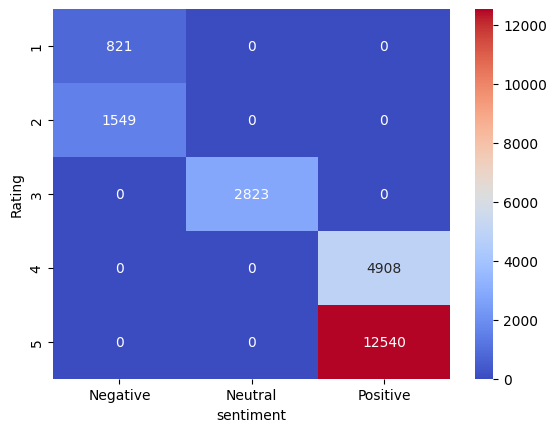

In [62]:
import seaborn as sns

heatmap_data = pd.crosstab(df['Rating'], df['sentiment'])

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='coolwarm'
)


“Interactive visualizations and dashboards were created to present sentiment trends, topic distributions, and review patterns, enabling stakeholders to easily interpret insights.”

# Save the Model

In [69]:
import joblib

joblib.dump(lr_balanced, "sentiment_lr_balanced.pkl")


['sentiment_lr_balanced.pkl']

In [70]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

# Load the model

In [73]:
import joblib

model = joblib.load("../notebooks/sentiment_lr_balanced.pkl")
vectorizer = joblib.load("../notebooks/tfidf_vectorizer.pkl")


Test with New Review

In [74]:
new_review = ["The fabric quality is very poor and fitting is bad"]

# Apply SAME preprocessing
new_review_clean = [preprocess(clean_text(new_review[0]))]

# Vectorize
X_new = vectorizer.transform(new_review_clean)

# Predict
prediction = model.predict(X_new)

print("Predicted Sentiment:", prediction[0])


Predicted Sentiment: Negative
